## Treebank and regexp parsers

Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [36]:
import nltk
pattern = 'NP: {<DT>?<JJ>*<NN>}'
regexp_parser = nltk.RegexpParser(pattern)

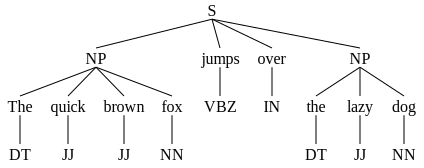

In [37]:
sent = [('The', 'DT'), ('quick', 'JJ'), ('brown', 'JJ'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]
treebank = regexp_parser.parse(sent)
treebank

The graph is amazing.

We then can try to put it to work

In [53]:
file_path = '../data/WSJ_02-21.pos-chunk'  

sentences = []
sentence = []

with open(file_path, 'r') as f:
    for line in f:
        if line.strip():  
            word = line.strip().split('\t')
            sentence.append(word)
        else:  
            if sentence:  
                sentences.append(sentence)
                sentence = []

Have to process the data to get the right format

In [39]:
processed_sentences = []
for sentence in sentences:
    token_postags = []
    bio_tags = []
    for word, pos_tag, bio_tag in sentence:
        token_postags.append((word, pos_tag))
        bio_tags.append(bio_tag)
    processed_sentences.append((token_postags))

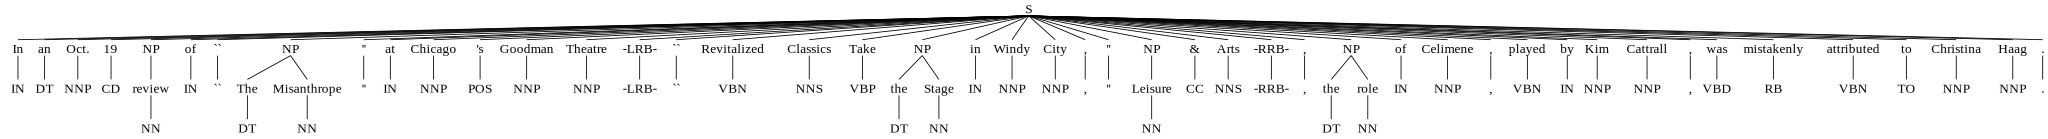

In [40]:
regexp_parser.parse(processed_sentences[0])

In [61]:
from nltk.chunk import tree2conlltags

tree = regexp_parser.parse(processed_sentences[0])
tree2conlltags(tree)

[('In', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('Oct.', 'NNP', 'O'),
 ('19', 'CD', 'O'),
 ('review', 'NN', 'B-NP'),
 ('of', 'IN', 'O'),
 ('``', '``', 'O'),
 ('The', 'DT', 'B-NP'),
 ('Misanthrope', 'NN', 'I-NP'),
 ("''", "''", 'O'),
 ('at', 'IN', 'O'),
 ('Chicago', 'NNP', 'O'),
 ("'s", 'POS', 'O'),
 ('Goodman', 'NNP', 'O'),
 ('Theatre', 'NNP', 'O'),
 ('-LRB-', '-LRB-', 'O'),
 ('``', '``', 'O'),
 ('Revitalized', 'VBN', 'O'),
 ('Classics', 'NNS', 'O'),
 ('Take', 'VBP', 'O'),
 ('the', 'DT', 'B-NP'),
 ('Stage', 'NN', 'I-NP'),
 ('in', 'IN', 'O'),
 ('Windy', 'NNP', 'O'),
 ('City', 'NNP', 'O'),
 (',', ',', 'O'),
 ("''", "''", 'O'),
 ('Leisure', 'NN', 'B-NP'),
 ('&', 'CC', 'O'),
 ('Arts', 'NNS', 'O'),
 ('-RRB-', '-RRB-', 'O'),
 (',', ',', 'O'),
 ('the', 'DT', 'B-NP'),
 ('role', 'NN', 'I-NP'),
 ('of', 'IN', 'O'),
 ('Celimene', 'NNP', 'O'),
 (',', ',', 'O'),
 ('played', 'VBN', 'O'),
 ('by', 'IN', 'O'),
 ('Kim', 'NNP', 'O'),
 ('Cattrall', 'NNP', 'O'),
 (',', ',', 'O'),
 ('was', 'VBD', 'O'),
 ('mistakenl

In [42]:
def evaluate(predictions, gold):
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(predictions)):
        pred = predictions[i][2]
        g = gold[i][2]
        for j in range(len(pred)):
            if pred[j] == g[j]:
                if pred[j] == 'O':
                    tn += 1
                else:
                    tp += 1
            else:
                if pred[j] == 'O':
                    fn += 1
                else:
                    fp += 1
    return tp, fp, tn, fn

In [43]:
tp, fp, tn, fn = evaluate(tree2conlltags(regexp_parser.parse(processed_sentences[0])), sentences[0])
print(f'Precision: {tp / (tp + fp):.2%}')
print(f'Recall: {tp / (tp + fn):.2%}')
print(f'F1: {2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn))):.2%}')

Precision: 96.88%
Recall: 63.27%
F1: 76.54%


The result isn't too bad! Let's scale it up and see the result.

In [54]:
tps, fps, tns, fns = 0, 0, 0, 0
for original, processed in zip(sentences, processed_sentences):
    treebank = regexp_parser.parse(processed)
    prediction = tree2conlltags(treebank)
    tp, fp, tn, fn = evaluate(prediction, original)
    tps += tp
    fps += fp
    tns += tn
    fns += fn

print(f'Precision: {tps / (tps + fps):.2%}')
print(f'Recall: {tps / (tps + fns):.2%}')
print(f'F1: {2 * (tps / (tps + fps)) * (tps / (tps + fns)) / ((tps / (tps + fps)) + (tps / (tps + fns))):.2%}')

Precision: 92.57%
Recall: 64.62%
F1: 76.11%


GOOD!